**Задача 1: Прогнозування попиту**

*Мета: Розробити систему прогнозування попиту на короткостроковий період (14 днів) через 7 днів від останньої дати в даних, для всіх груп товарів.*

Опис: 
1. Використовуючи надані дані про транзакції, створіть дві моделі 
прогнозування:
 - Модель машинного навчання.
 - Класичну модель прогнозування часових рядів.
   
2. Дайте обґрунтовані коментарі щодо вибору методів та підходів, 
поясніть, чому ви обрали саме їх.

3. Надати скрипт або ноутбук (.py/.ipynb), який буде містити 
технічне рішення та можливість розрахунку прогнозу на майбутній 
період (scoring).


Очікуваний результат: Файл з кодом (.py або .ipynb), який включає 
дві моделі прогнозування, пояснення вибору методів, і можливість 
розрахунку прогнозу на майбутній період.


# Робота з даними

## Завантаження даних

In [1]:
data_directory = "Data/S_Data"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
products = pd.read_csv(f'{data_directory}/products.csv')
orders = pd.read_csv(f'{data_directory}/orders.csv')
order_items = pd.read_csv(f'{data_directory}/order_items.csv')

In [4]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [5]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


## Первинна обробка

In [7]:
orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Бачимо що істнують замовлення що було відмінено, їх варто прибрати з вибірки адже це "надуманий" попит

In [8]:
orders = orders[~(orders["order_status"] == "canceled")]
orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Також багато колонок даних не мають цікавості в цьому дослідженні

 - З таблиці orders нам треба тільки: "order_id", "order_purchase_timestamp"
 - З products: "product_id", "product_category_name"
 - З order_items: "order_id", "order_item_id", "product_id"

In [9]:
orders = orders[["order_id", "order_purchase_timestamp"]]

In [10]:
products = products[["product_id", "product_category_name"]]

In [11]:
order_items = order_items[["order_id", "order_item_id", "product_id"]]

In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


В даних присутні 609 продуктів без катигорій, можна їх видалити або надати свою категорію

Перше прибере їх зі статистики, що може вплинути на обрахунки загального попиту

Друге передбачає надання категорії продуктам про яких ми нічого не знаємо, але можна їх зробити окремою категорією надавши однакове ім'я з айді продукта (якби мали назву продукта я б застосував її)

In [13]:
products.loc[:, "product_category_name"] = products["product_category_name"].fillna(products["product_id"])
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


## Завантаження в SQLite

In [14]:
import sqlite3
con = sqlite3.connect("data.db")

In [15]:
cur = con.cursor()

In [16]:
products.to_sql("products", con, if_exists='replace', index=False)

32951

In [17]:
orders.to_sql("orders", con, if_exists='replace', index=False)

98816

In [18]:
order_items.to_sql("order_items", con, if_exists='replace', index=False)

112650

### Об'єднання даних

In [19]:
res = cur.execute("""DROP VIEW IF EXISTS order_items_grouped""")
res.fetchall()

[]

In [20]:
res = cur.execute("""
CREATE VIEW order_items_grouped as
SELECT
order_id,
product_id,
COUNT(*) as prod_count
FROM order_items oi
GROUP BY order_id, product_id
""")
res.fetchall()

[]

In [21]:
res = cur.execute("""SELECT * FROM order_items_grouped limit 10""")
res.fetchall()

[('00010242fe8c5a6d1ba2dd792cb16214', '4244733e06e7ecb4970a6e2683c13e61', 1),
 ('00018f77f2f0320c557190d7a144bdd3', 'e5f2d52b802189ee658865ca93d83a8f', 1),
 ('000229ec398224ef6ca0657da4fc703e', 'c777355d18b72b67abbeef9df44fd0fd', 1),
 ('00024acbcdf0a6daa1e931b038114c75', '7634da152a4610f1595efa32f14722fc', 1),
 ('00042b26cf59d7ce69dfabb4e55b4fd9', 'ac6c3623068f30de03045865e4e10089', 1),
 ('00048cc3ae777c65dbb7d2a0634bc1ea', 'ef92defde845ab8450f9d70c526ef70f', 1),
 ('00054e8431b9d7675808bcb819fb4a32', '8d4f2bb7e93e6710a28f34fa83ee7d28', 1),
 ('000576fe39319847cbb9d288c5617fa6', '557d850972a7d6f792fd18ae1400d9b6', 1),
 ('0005a1a1728c9d785b8e2b08b904576c', '310ae3c140ff94b03219ad0adc3c778f', 1),
 ('0005f50442cb953dcd1d21e1fb923495', '4535b0e1091c278dfd193e5a1d63b39f', 1)]

Згрупуємо дані по категоріям та рокам, місяцям з днями, обраховуючи загальні покупки

In [22]:
res = cur.execute("""DROP VIEW IF EXISTS cat_demand""")
res.fetchall()

[]

In [23]:
res = cur.execute("""
CREATE VIEW cat_demand as
SELECT
p.product_category_name as category_name,
STRFTIME('%Y-%m-%d', o.order_purchase_timestamp) as purchase_timestamp,
SUM(oig.prod_count) as amount
FROM 
    order_items_grouped oig
    INNER JOIN orders o ON o.order_id = oig.order_id
    INNER JOIN products p ON p.product_id = oig.product_id
GROUP BY p.product_category_name, STRFTIME('%Y-%m-%d', o.order_purchase_timestamp)
""")
res.fetchall()

[]

In [24]:
res = cur.execute("""SELECT * FROM cat_demand limit 10""")
res.fetchall()

[('0082684bb4a60a862baaf7a60a5845ed', '2017-11-10', 1),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-03-24', 1),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-04-04', 1),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-04-08', 2),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-04-10', 2),
 ('00ab8a8b9fe219511dc3f178c6d79698', '2017-04-14', 2),
 ('00d62b338366db4c4aec8547ea8f928e', '2017-11-27', 1),
 ('0103863bf3441460142ec23c74388e4c', '2018-01-06', 1),
 ('014fcf6bd5cd4c7ee29fb3bb618c445e', '2018-03-04', 1),
 ('017457b0013d01d5a5a4a020ed1f14b9', '2017-11-24', 1)]

Завантажимо дані назад в датафрейм для продовження аналізу

In [25]:
category_stats = pd.read_sql_query("SELECT * FROM cat_demand", con)

In [26]:
category_stats

,category_name,purchase_timestamp,amount
0,0082684bb4a60a862baaf7a60a5845ed,2017-11-10,1
1,00ab8a8b9fe219511dc3f178c6d79698,2017-03-24,1
2,00ab8a8b9fe219511dc3f178c6d79698,2017-04-04,1
3,00ab8a8b9fe219511dc3f178c6d79698,2017-04-08,2
4,00ab8a8b9fe219511dc3f178c6d79698,2017-04-10,2
...,...,...,...
19747,utilidades_domesticas,2018-08-24,18
19748,utilidades_domesticas,2018-08-25,5
19749,utilidades_domesticas,2018-08-26,9
19750,utilidades_domesticas,2018-08-27,13


In [27]:
category_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19752 entries, 0 to 19751
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category_name       19752 non-null  object
 1   purchase_timestamp  19752 non-null  object
 2   amount              19752 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 463.1+ KB


Зведемо дані до єдиних типів

In [28]:
category_stats["purchase_timestamp"] = pd.to_datetime(category_stats["purchase_timestamp"])
category_stats["category_name"] = category_stats["category_name"].astype("string")
category_stats

,category_name,purchase_timestamp,amount
0,0082684bb4a60a862baaf7a60a5845ed,2017-11-10,1
1,00ab8a8b9fe219511dc3f178c6d79698,2017-03-24,1
2,00ab8a8b9fe219511dc3f178c6d79698,2017-04-04,1
3,00ab8a8b9fe219511dc3f178c6d79698,2017-04-08,2
4,00ab8a8b9fe219511dc3f178c6d79698,2017-04-10,2
...,...,...,...
19747,utilidades_domesticas,2018-08-24,18
19748,utilidades_domesticas,2018-08-25,5
19749,utilidades_domesticas,2018-08-26,9
19750,utilidades_domesticas,2018-08-27,13


In [29]:
category_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19752 entries, 0 to 19751
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   category_name       19752 non-null  string        
 1   purchase_timestamp  19752 non-null  datetime64[ns]
 2   amount              19752 non-null  int64         
dtypes: datetime64[ns](1), int64(1), string(1)
memory usage: 463.1 KB


In [30]:
by_day_activity = category_stats.groupby("purchase_timestamp").sum().drop("category_name", axis = 1).sort_values(by = "purchase_timestamp")
by_day_activity

,amount
purchase_timestamp,
2016-09-04,2
2016-09-15,3
2016-10-03,7
2016-10-04,67
2016-10-05,55
...,...
2018-08-26,82
2018-08-27,71
2018-08-28,45


In [31]:
# making a by day index
by_day_activity = by_day_activity.reindex(pd.date_range(start=by_day_activity.index.min(), end=by_day_activity.index.max()))
by_day_activity.fillna({"amount" : 0}, inplace = True)
by_day_activity[["amount"]] = by_day_activity[["amount"]].astype(int)
by_day_activity

,amount
2016-09-04,2
2016-09-05,0
2016-09-06,0
2016-09-07,0
2016-09-08,0
...,...
2018-08-30,0
2018-08-31,0
2018-09-01,0
2018-09-02,0


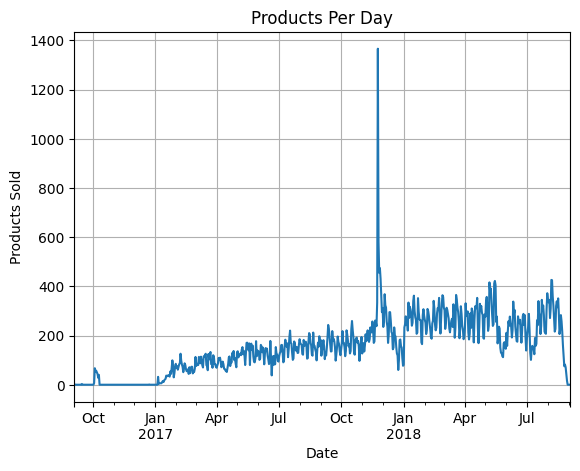

In [32]:
by_day_activity['amount'].plot(kind='line')
plt.title('Products Per Day')
plt.xlabel('Date')
plt.ylabel('Products Sold')
plt.grid(True)
plt.show()

Схоже що до початку 2017 року дані є неповними, варто їх прибрати для уникнення їх пливу, таксамо дані за останні 10 днів в наборі

In [33]:
by_day_activity = by_day_activity.truncate(before = "2017-01-15", after = "2018-08-24")

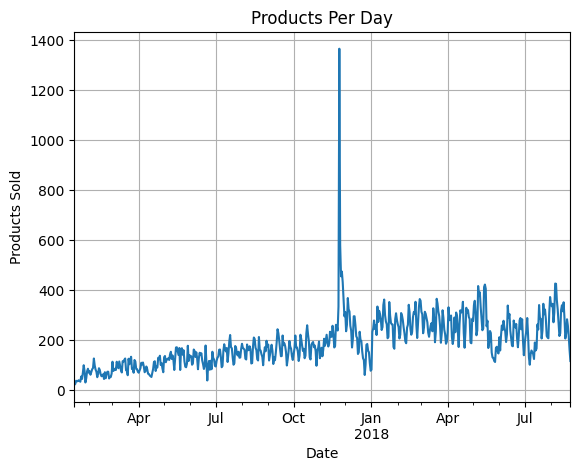

In [34]:
by_day_activity['amount'].plot(kind='line')
plt.title('Products Per Day')
plt.xlabel('Date')
plt.ylabel('Products Sold')
plt.grid(True)
plt.show()

# Розробка моделей

In [35]:
# transforming datetime into int format
X = by_day_activity.index.values.astype(np.int64) // 10 ** 11
y = by_day_activity["amount"].values

In [36]:
X_train = X[:-7]
y_train = y[:-7]

X_test = X[-7:]
y_test = y[-7:]

In [37]:
X_test.shape

(7,)

In [38]:
# we have a big outlier in the data, we should add scaling to see if that impact training process
from sklearn.preprocessing import QuantileTransformer
scale_transformer = QuantileTransformer(n_quantiles = 100)

import joblib
joblib.dump(scale_transformer, "models/sales_scale_transformer.pkl")

y_scaled = scale_transformer.fit_transform(y_train.reshape(-1, 1))

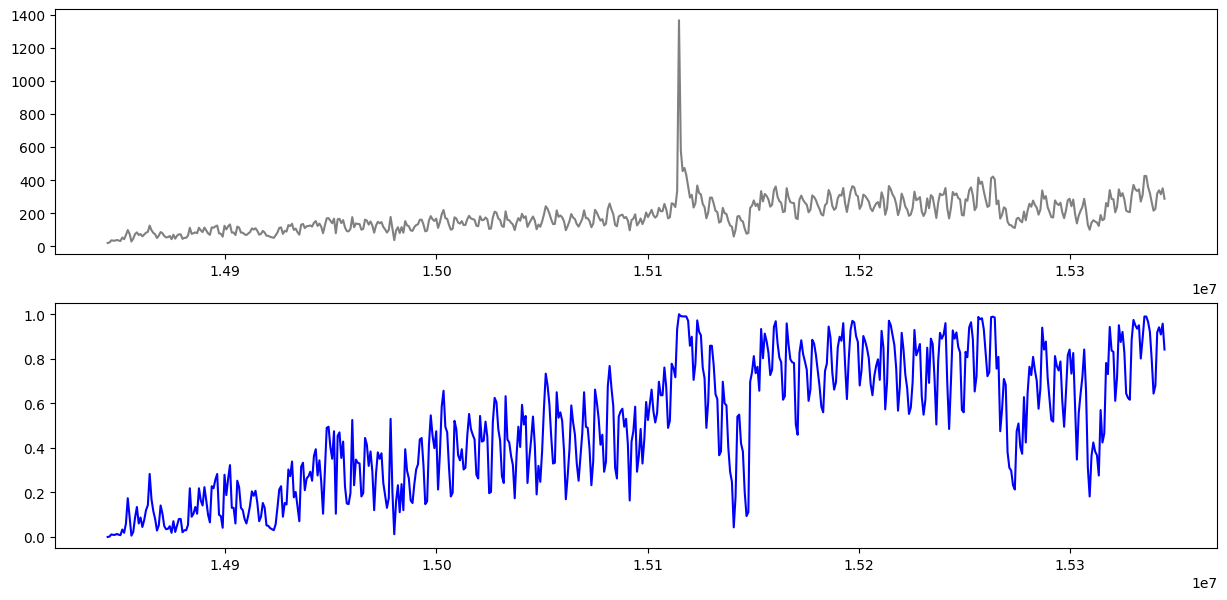

In [39]:
fig, ax = plt.subplots(2, 1)

ax[0].plot(X_train, y_train, "gray")
ax[1].plot(X_train, y_scaled, "blue")

fig.set_figwidth(15)
fig.set_figheight(7)

plt.show()

## Лінійні моделі

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
LR = LinearRegression()

In [42]:
LR.fit(X = X.reshape(-1, 1), y = y)

LinearRegression()

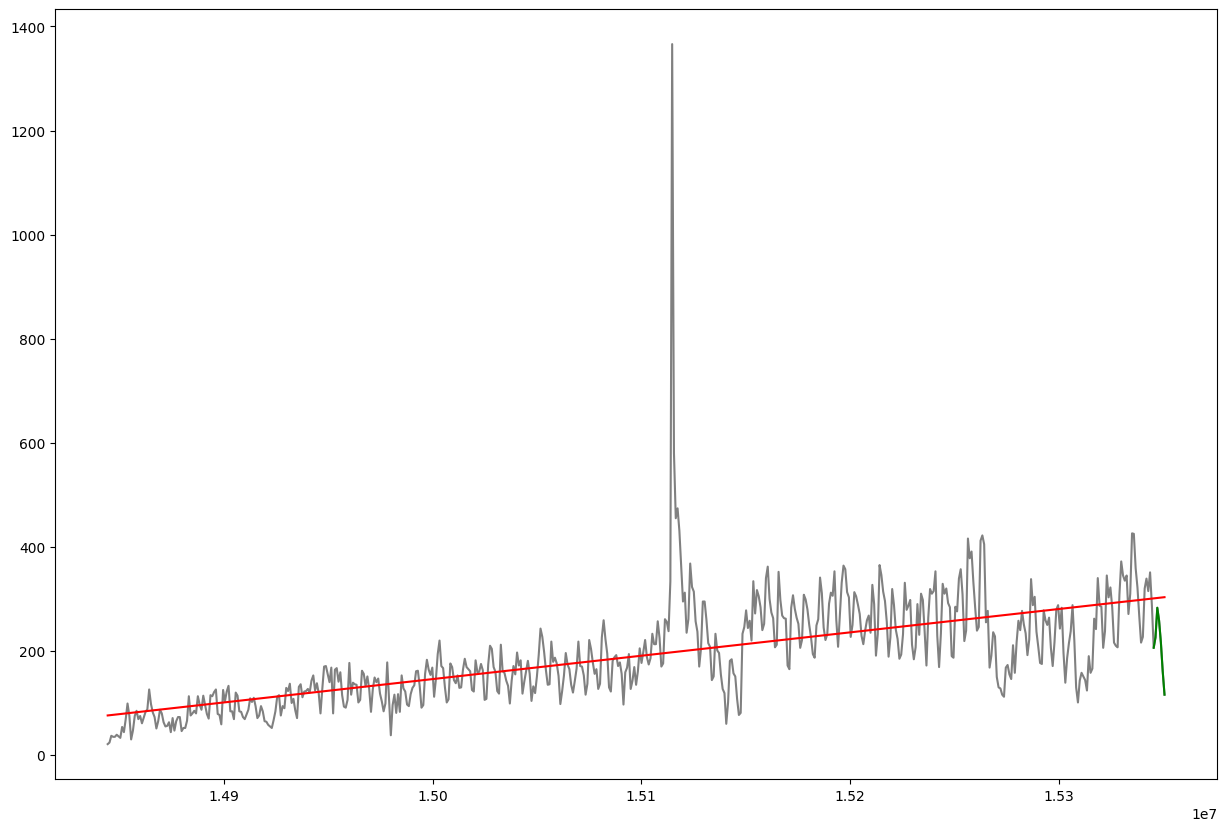

In [43]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")
ax.plot(X, LR.predict(X.reshape(-1, 1)), "red")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

Ця модель показує загальний тренд, але для наших задач не є ідеальною

## Поліноміальні моделі

### Un-Scaled training

In [44]:
poly_degree_range = range(2, 7)

resulting_polies = []

for i in poly_degree_range:
    resulting_polies.append(np.poly1d(np.polyfit(X_train, y_train, i)))

C:\Users\misha\AppData\Local\Temp\ipykernel_14204\2481846824.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies.append(np.poly1d(np.polyfit(X_train, y_train, i)))


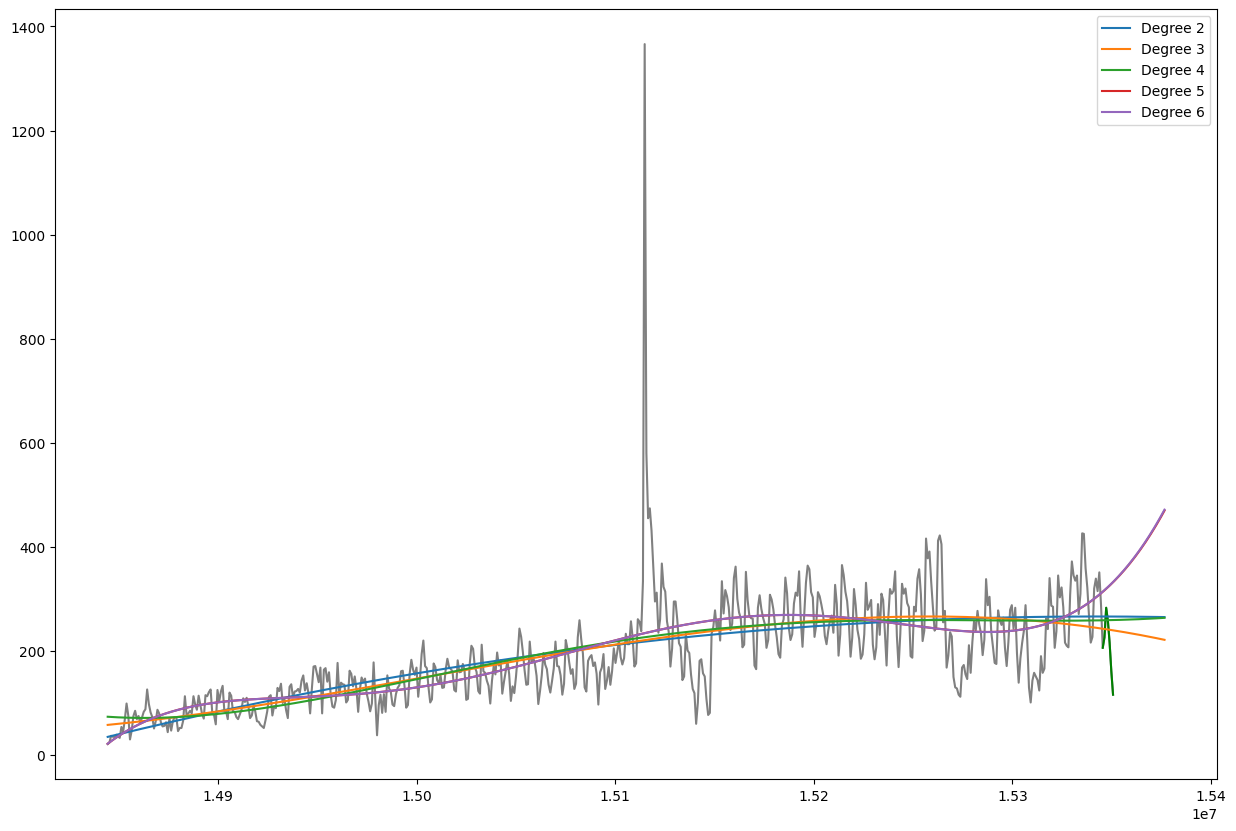

In [45]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")

extra_month = (X + (X.max() -X.min()))[:31]

for i, POLY in enumerate(resulting_polies):
    ax.plot(np.concatenate((X, extra_month)), np.apply_along_axis(POLY, 0, np.concatenate((X, extra_month))), label = f"Degree {i + min(poly_degree_range)}")
    
fig.set_figwidth(15)
fig.set_figheight(10)

ax.legend()

plt.show()

З графіку поліном 4 порядку є найближчим до правди

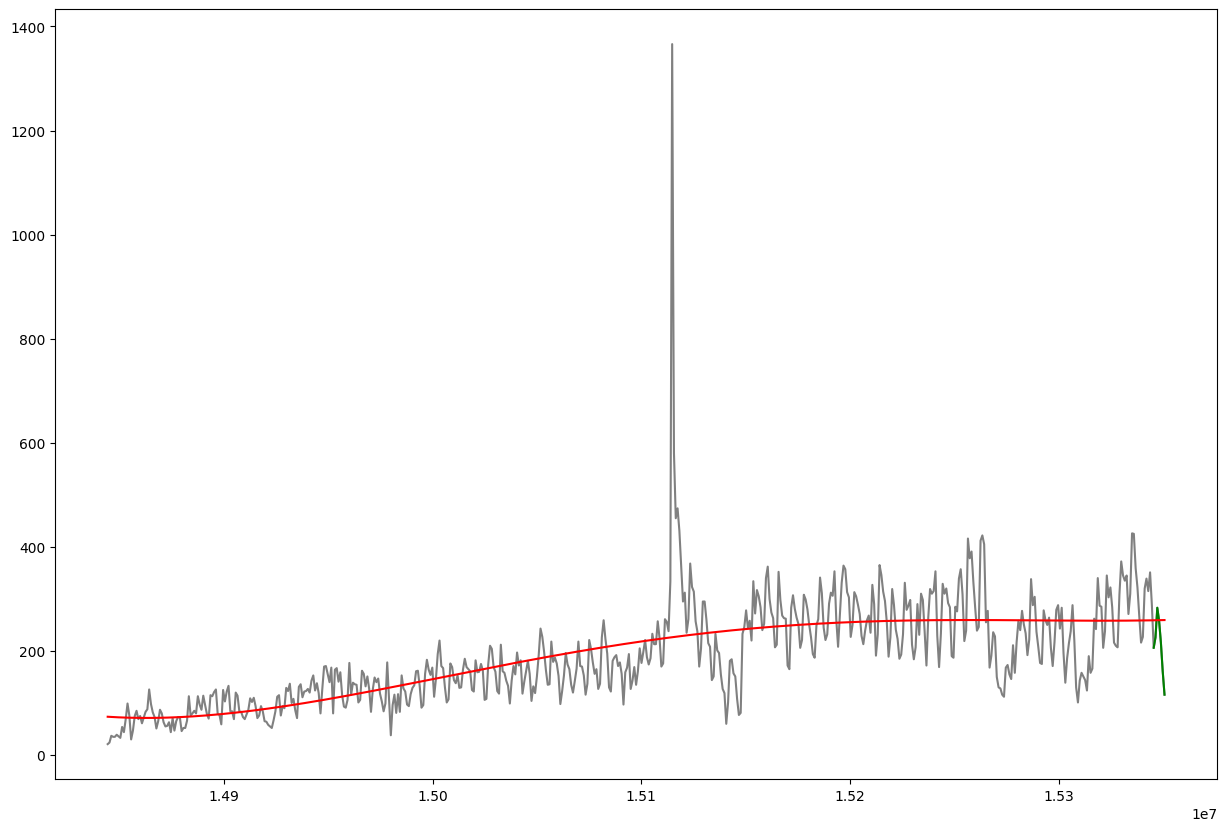

In [46]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")
ax.plot(X, np.apply_along_axis(resulting_polies[2], 0, X), "red")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

This looks to be the best fitting model

In [47]:
POL_4 = resulting_polies[2]

### Scaled training

In [48]:
poly_degree_range = range(2, 10)

resulting_polies_scaled = []

for i in poly_degree_range:
    resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))

C:\Users\misha\AppData\Local\Temp\ipykernel_14204\797662531.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))
C:\Users\misha\AppData\Local\Temp\ipykernel_14204\797662531.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))
C:\Users\misha\AppData\Local\Temp\ipykernel_14204\797662531.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))
C:\Users\misha\AppData\Local\Temp\ipykernel_14204\797662531.py:6: RankWarning: Polyfit may be poorly conditioned
  resulting_polies_scaled.append(np.poly1d(np.polyfit(X_train, y_scaled.reshape(-1), i)))


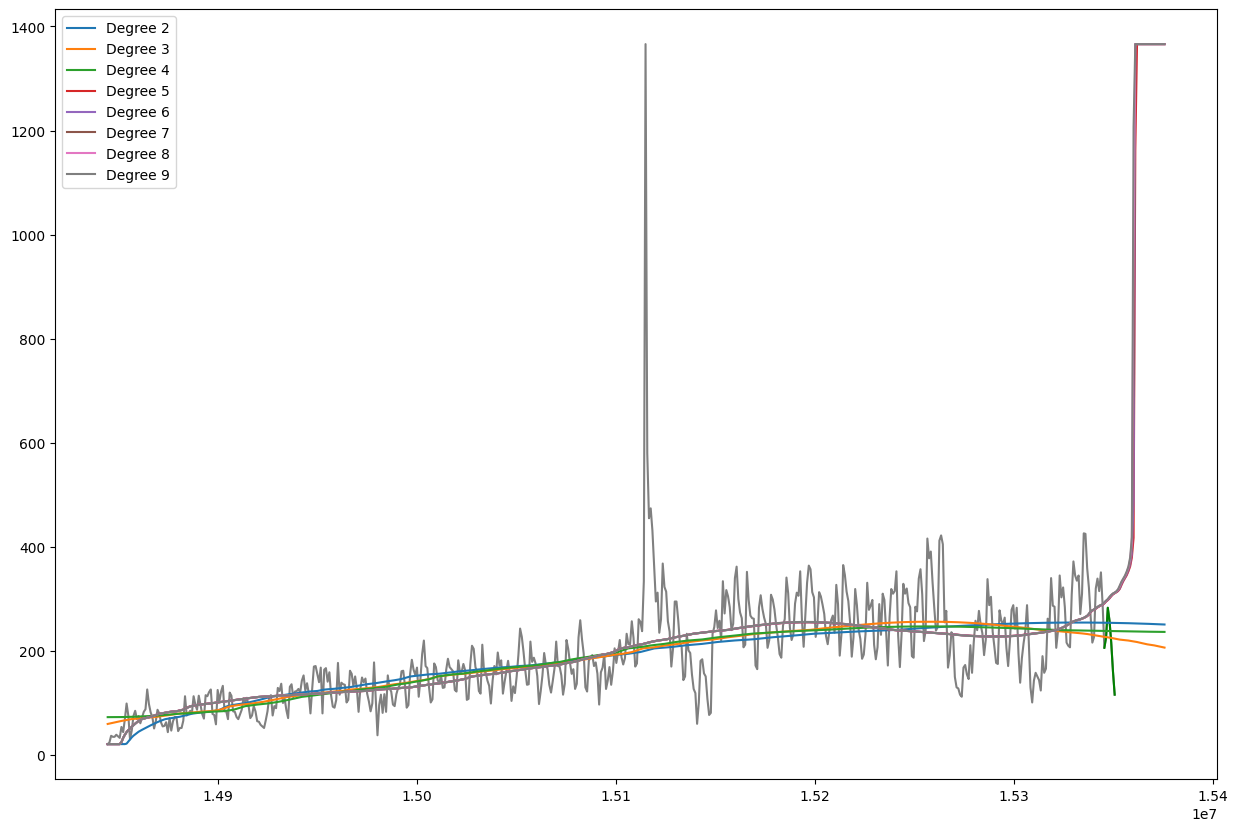

In [49]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")

extra_month = (X + (X.max() -X.min()))[:30]

for i, POLY in enumerate(resulting_polies_scaled):

    y_pred_scaled = np.apply_along_axis(POLY, 0, np.concatenate((X, extra_month)))
    y_pred = scale_transformer.inverse_transform(y_pred_scaled.reshape(-1,1))
    
    ax.plot(
        np.concatenate((
            X, extra_month
        )), 
        y_pred, 
        label = f"Degree {i + min(poly_degree_range)}"
    )
    
fig.set_figwidth(15)
fig.set_figheight(10)

ax.legend()

plt.show()

З графіку поліном 4 порядку є найближчим до правди

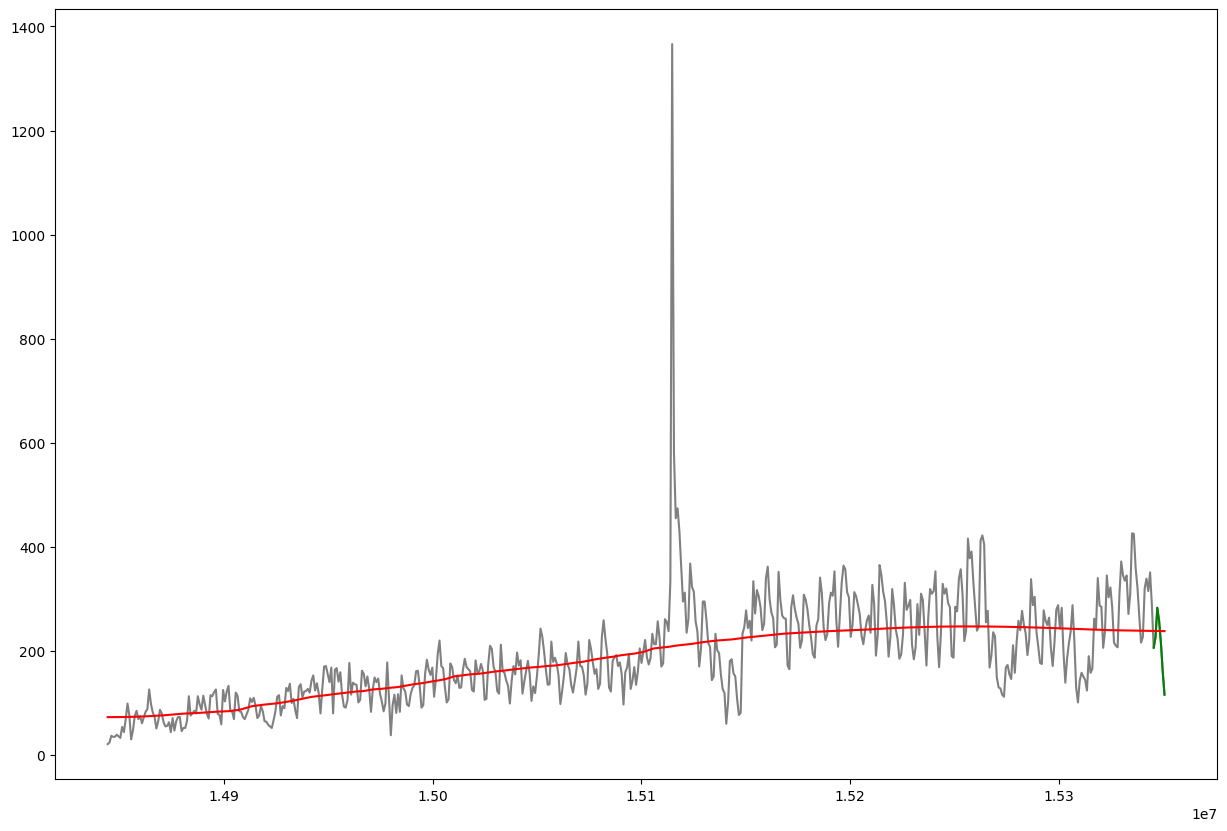

In [50]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X_test, y_test, "green")
ax.plot(X, scale_transformer.inverse_transform(np.apply_along_axis(resulting_polies_scaled[2], 0, X).reshape(-1,1)), "red")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

In [51]:
POL_4_SCALED = resulting_polies_scaled[2]

Same deg is best when scaled, lets compare them to each other, and basic linear function

In [52]:
def function_stats(name, pred, actual = y_test):
    print(f"{name}:")
    print(f"Prediction: {pred}")
    print(f"Actual diff: {actual - pred}")
    print(f"MSE: {(actual - pred).mean() ** 2}")

In [53]:
function_stats("Linear function", LR.predict(X_test.reshape(-1, 1)), y[-7:])

Linear function:
Prediction: [300.9873108  301.37510055 301.7628903  302.15068005 302.5384698
 302.92625955 303.3140493 ]
Actual diff: [ -94.9873108   -75.37510055  -18.7628903   -44.15068005  -86.5384698
 -141.92625955 -187.3140493 ]
MSE: 8597.389426950958


In [54]:
function_stats("POL_4 function", 
               np.apply_along_axis(POL_4, 0, X_test),
               y[-7:]
              )

POL_4 function:
Prediction: [258.91317081 258.9793067  259.04850781 259.12082803 259.19632244
 259.27504587 259.35705423]
Actual diff: [ -52.91317081  -32.9793067    23.95149219   -1.12082803  -43.19632244
  -98.27504587 -143.35705423]
MSE: 2469.9513517381465


In [55]:
function_stats("POL_4_SCALED function", 
               scale_transformer.inverse_transform(np.apply_along_axis(POL_4_SCALED, 0, X_test).reshape(-1,1)).reshape(-1),
               y[-7:]
              )

POL_4_SCALED function:
Prediction: [238.42698883 238.36892708 238.31137563 238.25435906 238.19790204
 238.14203003 238.08676731]
Actual diff: [ -32.42698883  -12.36892708   44.68862437   19.74564094  -22.19790204
  -77.14203003 -122.08676731]
MSE: 830.9905753451872


This shows that POL_4_SCALED is the closed to actual next week data 

## Нейронні моделі

Для початку треба перевести дані у векторизований формат

In [56]:
machine_data = pd.DataFrame(index = X_train, data = y_scaled, columns = ["prod_sold"])
machine_data

,prod_sold
14844384,0.000000
14845248,0.002041
14846112,0.011320
14846976,0.009524
14847840,0.009524
...,...
15341184,0.918402
15342048,0.941434
15342912,0.909091
15343776,0.957704


In [57]:
machine_data["timestamp"] = pd.to_datetime(machine_data.index.values * 10 ** 11)
machine_data = machine_data.reset_index()

machine_data["week_day"] = machine_data["timestamp"].dt.weekday
machine_data["month_day"] = machine_data["timestamp"].dt.day
machine_data["month"] = machine_data["timestamp"].dt.month

machine_data

,index,prod_sold,timestamp,week_day,month_day,month
0,14844384,0.000000,2017-01-15,6,15,1
1,14845248,0.002041,2017-01-16,0,16,1
2,14846112,0.011320,2017-01-17,1,17,1
3,14846976,0.009524,2017-01-18,2,18,1
4,14847840,0.009524,2017-01-19,3,19,1
...,...,...,...,...,...,...
575,15341184,0.918402,2018-08-13,0,13,8
576,15342048,0.941434,2018-08-14,1,14,8
577,15342912,0.909091,2018-08-15,2,15,8
578,15343776,0.957704,2018-08-16,3,16,8


In [58]:
machine_data["day_back_1"] = pd.concat([machine_data["prod_sold"][:1], machine_data["prod_sold"][:-1]], ignore_index = True)
machine_data["day_back_2"] = pd.concat([machine_data["prod_sold"][:2], machine_data["prod_sold"][:-2]], ignore_index = True)
machine_data["day_back_3"] = pd.concat([machine_data["prod_sold"][:3], machine_data["prod_sold"][:-3]], ignore_index = True)
machine_data["day_back_4"] = pd.concat([machine_data["prod_sold"][:4], machine_data["prod_sold"][:-4]], ignore_index = True)
machine_data = machine_data[4:]
machine_data

,index,prod_sold,timestamp,week_day,month_day,month,day_back_1,day_back_2,day_back_3,day_back_4
4,14847840,0.009524,2017-01-19,3,19,1,0.009524,0.011320,0.002041,0.000000
5,14848704,0.013436,2017-01-20,4,20,1,0.009524,0.009524,0.011320,0.002041
6,14849568,0.010261,2017-01-21,5,21,1,0.013436,0.009524,0.009524,0.011320
7,14850432,0.008163,2017-01-22,6,22,1,0.010261,0.013436,0.009524,0.009524
8,14851296,0.033463,2017-01-23,0,23,1,0.008163,0.010261,0.013436,0.009524
...,...,...,...,...,...,...,...,...,...,...
575,15341184,0.918402,2018-08-13,0,13,8,0.680135,0.643939,0.795286,0.920697
576,15342048,0.941434,2018-08-14,1,14,8,0.918402,0.680135,0.643939,0.795286
577,15342912,0.909091,2018-08-15,2,15,8,0.941434,0.918402,0.680135,0.643939
578,15343776,0.957704,2018-08-16,3,16,8,0.909091,0.941434,0.918402,0.680135


In [59]:
machine_data.corr()["prod_sold"].abs().sort_values().apply(lambda b:f"{b :.6f}")

month_day     0.079625
month         0.102397
week_day      0.275275
day_back_4    0.733555
day_back_3    0.746280
index         0.780410
timestamp     0.780410
day_back_2    0.791172
day_back_1    0.889943
prod_sold     1.000000
Name: prod_sold, dtype: object

This shows very bad correlation of separate time elements to train the model, but using timestamps whole is difficult for the model, thus requring testing of this training. Bacause weekday provides most correlation it will be vectorised, other numerical values will be scaled

In [60]:
# Normalizing the data

day_dummies = pd.get_dummies(machine_data["week_day"], prefix="IsDay")  # week day has the most corr, so I set it as vector

machine_data = pd.concat([machine_data, day_dummies], axis=1)


machine_data["month_day_norm"] = (machine_data["month_day"]-machine_data["month_day"].min())/(machine_data["month_day"].max()-machine_data["month_day"].min())


machine_data["month_norm"] = (machine_data["month"]-machine_data["month"].min())/(machine_data["month"].max()-machine_data["month"].min())


machine_data

,index,prod_sold,timestamp,week_day,month_day,month,day_back_1,day_back_2,day_back_3,day_back_4,IsDay_0,IsDay_1,IsDay_2,IsDay_3,IsDay_4,IsDay_5,IsDay_6,month_day_norm,month_norm
4,14847840,0.009524,2017-01-19,3,19,1,0.009524,0.011320,0.002041,0.000000,False,False,False,True,False,False,False,0.600000,0.000000
5,14848704,0.013436,2017-01-20,4,20,1,0.009524,0.009524,0.011320,0.002041,False,False,False,False,True,False,False,0.633333,0.000000
6,14849568,0.010261,2017-01-21,5,21,1,0.013436,0.009524,0.009524,0.011320,False,False,False,False,False,True,False,0.666667,0.000000
7,14850432,0.008163,2017-01-22,6,22,1,0.010261,0.013436,0.009524,0.009524,False,False,False,False,False,False,True,0.700000,0.000000
8,14851296,0.033463,2017-01-23,0,23,1,0.008163,0.010261,0.013436,0.009524,True,False,False,False,False,False,False,0.733333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,15341184,0.918402,2018-08-13,0,13,8,0.680135,0.643939,0.795286,0.920697,True,False,False,False,False,False,False,0.400000,0.636364
576,15342048,0.941434,2018-08-14,1,14,8,0.918402,0.680135,0.643939,0.795286,False,True,False,False,False,False,False,0.433333,0.636364
577,15342912,0.909091,2018-08-15,2,15,8,0.941434,0.918402,0.680135,0.643939,False,False,True,False,False,False,False,0.466667,0.636364
578,15343776,0.957704,2018-08-16,3,16,8,0.909091,0.941434,0.918402,0.680135,False,False,False,True,False,False,False,0.500000,0.636364


In [61]:
machine_data_train = machine_data.sample(frac=0.9,random_state=200)
machine_data_test = machine_data.drop(machine_data_train.index)

m_x_train = machine_data_train[["day_back_1", "day_back_2", "day_back_3", "day_back_4", "month_day_norm", "month_norm", "IsDay_0", "IsDay_1", "IsDay_2", "IsDay_3", "IsDay_4", "IsDay_5", "IsDay_6"]]
m_x_test = machine_data_test[["day_back_1", "day_back_2", "day_back_3", "day_back_4", "month_day_norm", "month_norm", "IsDay_0", "IsDay_1", "IsDay_2", "IsDay_3", "IsDay_4", "IsDay_5", "IsDay_6"]]

m_y_train = machine_data_train[["prod_sold"]]
m_y_test = machine_data_test[["prod_sold"]]

print(m_x_train.shape, m_y_train.shape, m_x_test.shape, m_y_test.shape, sep = "\n")

(518, 13)
(518, 1)
(58, 13)
(58, 1)


In [62]:
import keras

sales_model = keras.models.Sequential([
    keras.layers.InputLayer(shape=(m_x_train.shape[1],)),
    keras.layers.Flatten(),
    keras.layers.Dense(m_x_train.shape[1], activation='relu'),
    keras.layers.Dense(m_x_train.shape[1], activation='relu'),
    keras.layers.Dense(m_x_train.shape[1], activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

In [63]:
sales_model.compile(
    optimizer = "rmsprop", 
    loss = "mean_squared_error",
)

In [64]:
callbacks = [keras.callbacks.ModelCheckpoint("models/best_model.keras", save_best_only=True)]

In [65]:
sales_model.fit(
    m_x_train.astype(float).to_numpy(copy=False), 
    m_y_train.astype(float).to_numpy(copy=False),
    epochs=100, 
    batch_size=16, 
    validation_data=(
        m_x_test.astype(float).to_numpy(copy=False), 
        m_y_test.astype(float).to_numpy(copy=False)
    ),
    callbacks = callbacks
)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0751 - val_loss: 0.0714
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0708 - val_loss: 0.0616
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0647 - val_loss: 0.0500
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534 - val_loss: 0.0369
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0370 - val_loss: 0.0229
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 - val_loss: 0.0145
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172 - val_loss: 0.0112
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 - val_loss: 0.0099
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0136 - val_loss: 0.0096
Epoch 10/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 - val_loss: 0.0087
Epoch 11/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0104 - val_loss: 0.0083
Epoch 12/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.

In [66]:
sales_model.save("models/sales_model_checkpoint1.keras")

In [67]:
best_sales_model = keras.saving.load_model("models/best_model.keras")

In [68]:
model_prediction = best_sales_model.predict(m_x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [69]:
function_stats("Neural", model_prediction.reshape(-1), m_y_test["prod_sold"].values)

Neural:
Prediction: [0.06441191 0.06834073 0.15901455 0.10812217 0.16067639 0.20833544
 0.11449701 0.07497241 0.2482835  0.10539658 0.43459278 0.1958259
 0.4071034  0.2485265  0.23480217 0.3248569  0.1971932  0.29863816
 0.51026464 0.3664291  0.30903286 0.31074217 0.5773319  0.4484263
 0.16603488 0.68360835 0.6306435  0.5251039  0.3015931  0.5309917
 0.54836506 0.9778472  0.70116174 0.8288215  0.22123417 0.60170925
 0.8993061  0.6571909  0.70835316 0.92882615 0.767935   0.8863914
 0.7159522  0.91687346 0.634471   0.9176853  0.87460035 0.8893689
 0.9434943  0.39195943 0.8384585  0.49752125 0.8254682  0.6780074
 0.75200903 0.89514315 0.91796523 0.88181365]
Actual diff: [-3.80584778e-03  1.05634311e-01 -6.81054619e-02 -8.51742689e-03
 -9.50198243e-02 -2.34019977e-02 -4.37899427e-02 -3.51907102e-02
  9.05143088e-02  4.20235712e-02 -2.02269551e-01 -1.40077228e-02
 -8.79544533e-02  3.43017842e-02  1.59137222e-01  4.88804666e-02
 -1.53750235e-02 -9.92458680e-02 -2.54161502e-02 -2.24574593e-02

In [70]:
def chain_predict_model(date_start, date_end, prev_sells = None, predict_model = sales_model):

    """
        date_start    - int timestamp of period start
        date_end      - int timestamp of period end
        prev_sells    - np array of 4 elements of previous sales
        predict_model - model used for prediction
    """
    
    if prev_sells is None:
        prev_sells = np.zeros(4)

    prev_sells = scale_transformer.transform(prev_sells.reshape(-1, 1)).reshape(-1)

    today = date_start
    today_timestamp = pd.to_datetime(today)

    end_timestamp = pd.to_datetime(date_end)

    while today_timestamp <= end_timestamp:
        
        today_sales = predict_model.predict(np.array([[
            prev_sells[0],
            prev_sells[1],
            prev_sells[2],
            prev_sells[3],
            (today_timestamp.day - 1) / 30,
            (today_timestamp.month - 1) / 11,
            int(today_timestamp.dayofweek == 0),
            int(today_timestamp.dayofweek == 1),
            int(today_timestamp.dayofweek == 2),
            int(today_timestamp.dayofweek == 3),
            int(today_timestamp.dayofweek == 4),
            int(today_timestamp.dayofweek == 5),
            int(today_timestamp.dayofweek == 6),
        ]]), verbose=0)
        
        yield scale_transformer.inverse_transform(today_sales).reshape(-1)

        prev_sells[:-1] = prev_sells[1:]
        prev_sells[-1] = today_sales[0][0]

        today_timestamp += pd.DateOffset(1)
    

In [71]:
two_year_prediction = np.array(
    list(chain_predict_model(X[4] * 10 ** 11, X[-1] * 10 ** 11, y[:4], predict_model = best_sales_model))
)

In [72]:
week_prediction = np.array(
    list(chain_predict_model(X[-7] * 10 ** 11, X[-1] * 10 ** 11, y[-12:-8], predict_model = best_sales_model))
)

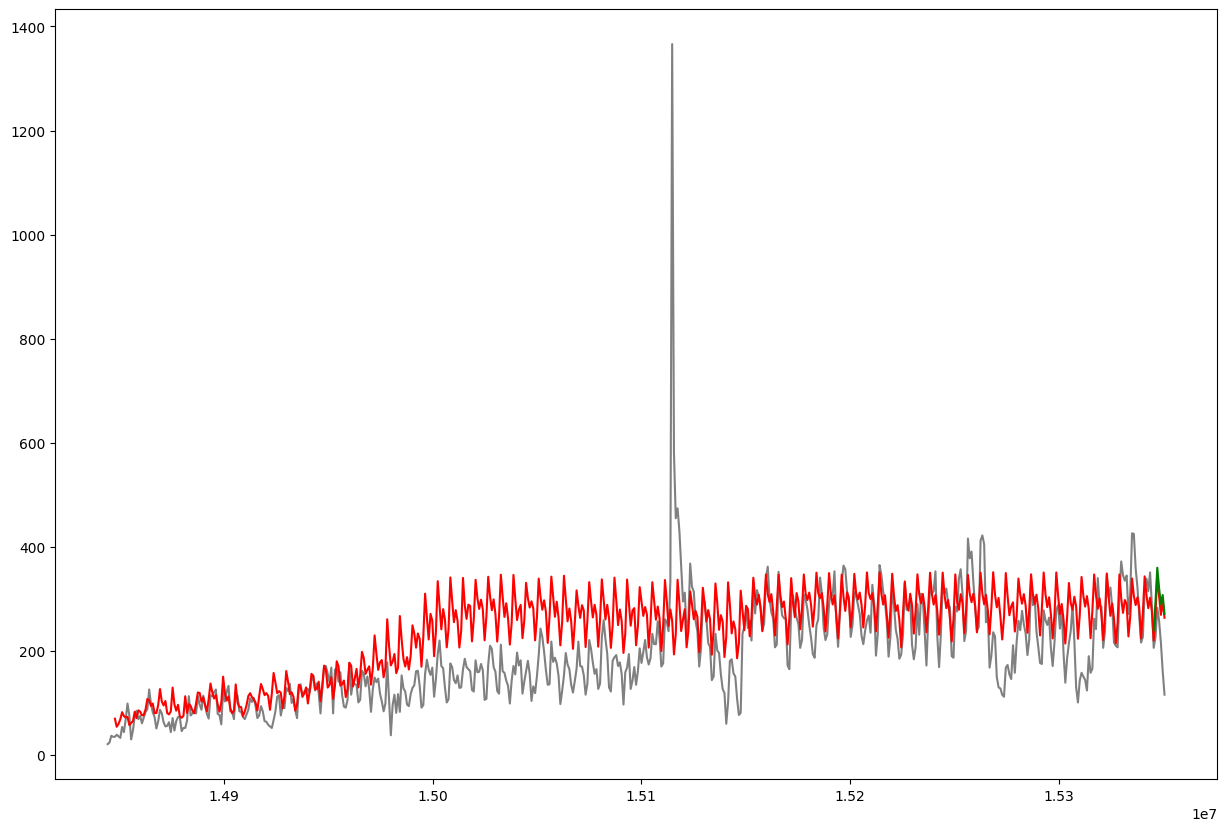

In [73]:
fig, ax = plt.subplots()

ax.plot(X, y, "gray")
ax.plot(X[4:], two_year_prediction.reshape(-1), "red")
ax.plot(X[-7:], week_prediction.reshape(-1), "green")

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

In [74]:
function_stats("Machine model", week_prediction.reshape(-1), y[-7:])

Machine model:
Prediction: [239.82495 293.57275 359.92133 320.50342 290.17453 307.50653 271.19992]
Actual diff: [ -33.82495117  -67.57275391  -76.92132568  -62.50341797  -74.17453003
 -146.50653076 -155.19992065]
MSE: 7761.696342664791


Незважаючи що модель машинного навчання показує краші результати зі знаходження циклічності, вона не надає правильних значень, тому її застовування може бути не точним, але всеодно корисним для побудови моделі продаж

## ARIMA model

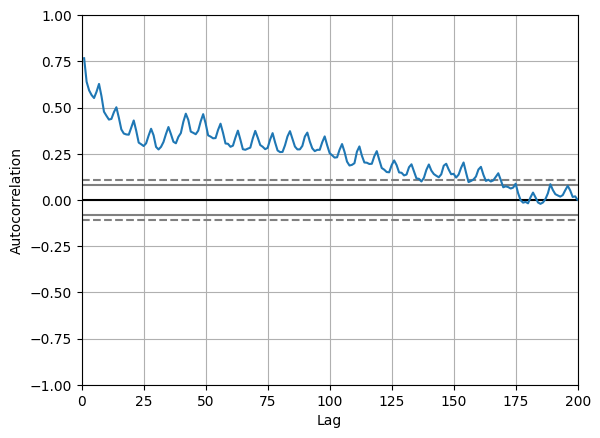

In [75]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(pd.Series(index = X_train, data = y_train))
ax = plt.gca()
ax.set_xlim([0, 200])
# ax.set_ylim([ymin, ymax])
plt.show()

Позитивна кореляція йде до 175 лага, але релевантні лаги знаходяться до 25го

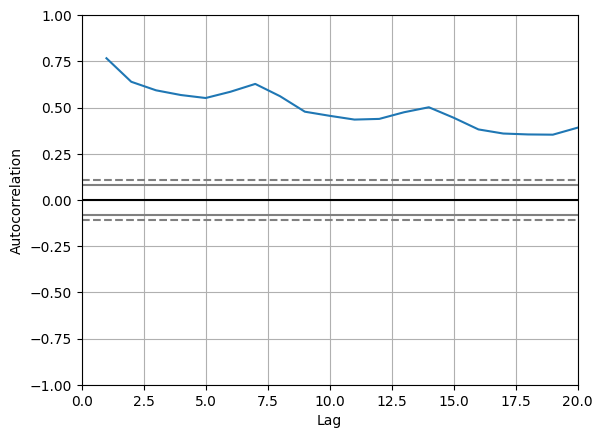

In [76]:
autocorrelation_plot(pd.Series(index = X_train, data = y_train))
ax = plt.gca()

ax.set_xlim([0, 20])
plt.show()

Тут видно, що сьомий лаг може бути найоптимальнишім

C:\Users\misha\anaconda3\envs\DA_test\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\misha\anaconda3\envs\DA_test\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\misha\anaconda3\envs\DA_test\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  580
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -3213.279
Date:                Thu, 08 Aug 2024   AIC                           6438.559
Time:                        22:46:10   BIC                           6464.727
Sample:                             0   HQIC                          6448.762
                                - 580                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3875      0.012    -31.041      0.000      -0.412      -0.363
ar.L2         -0.3829      0.074     -5.183      0.000      -0.528      -0.238
ar.L3         -0.2955      0.069     -4.300      0.0

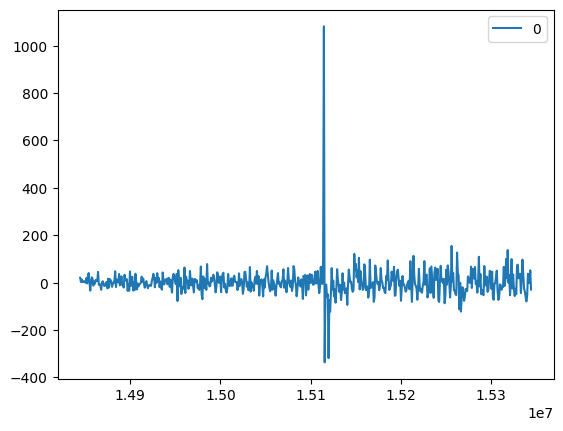

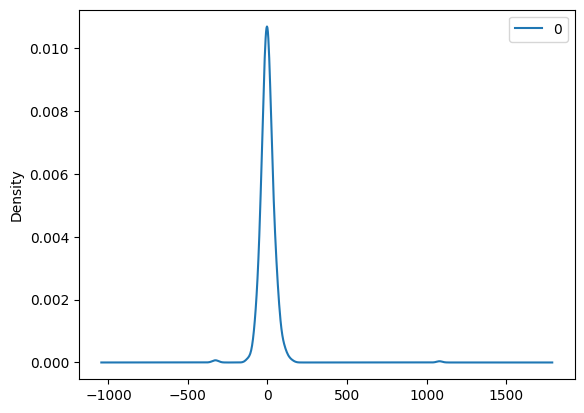

                 0
count   580.000000
mean      1.264945
std      62.185622
min    -335.929855
25%     -23.234326
50%      -0.607329
75%      20.828230
max    1081.494399


In [77]:
# fit an ARIMA model and plot residual errors
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(pd.Series(index = X_train, data = y_train), order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [78]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(by_day_activity["amount"].values)
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.958024
p-value: 0.039005


Because our data is stationary we should not apply differencing

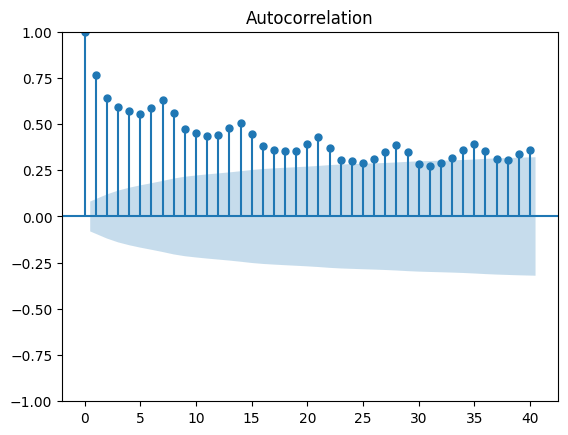

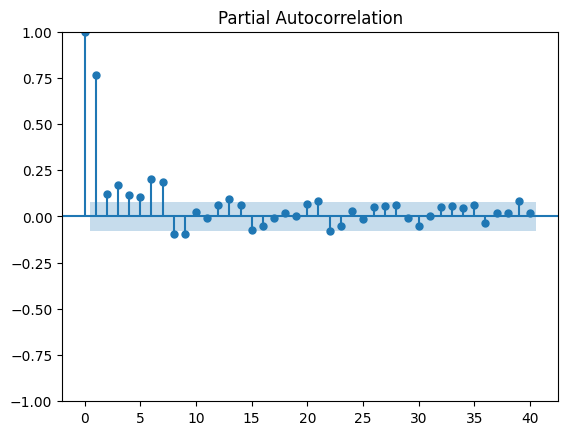

In [79]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(by_day_activity["amount"].values, lags=40)
plot_pacf(by_day_activity["amount"].values, lags=40)
plt.show()

q is best described by autocorrelation and = to 1
d is 0
p is best described by partial autocorrelation and = to 1

In [80]:
from statsmodels.tsa.arima.model import ARIMA

ARIMA_model = ARIMA(by_day_activity[:-7], order=(1, 0, 1))
ARIMA_model_hsitory = ARIMA_model.fit()
print(ARIMA_model_hsitory.summary())

                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                  580
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3238.230
Date:                Thu, 08 Aug 2024   AIC                           6484.460
Time:                        22:46:11   BIC                           6501.912
Sample:                    01-15-2017   HQIC                          6491.264
                         - 08-17-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        189.4438     25.671      7.380      0.000     139.130     239.757
ar.L1          0.9072      0.024     37.376      0.000       0.860       0.955
ma.L1         -0.3791      0.030    -12.512      0.0

AIC is very unpleasant but lets see how the models predicts the data

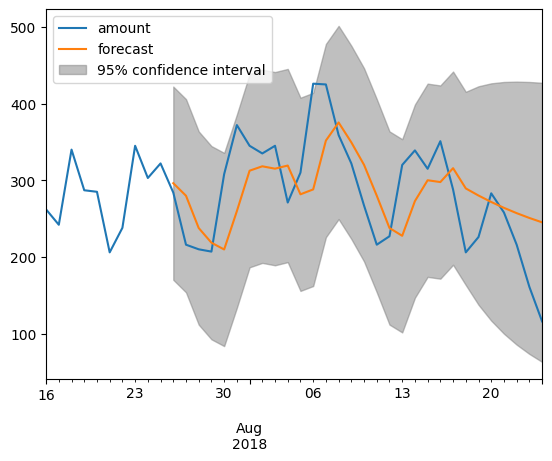

In [81]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots()
ax = by_day_activity[-40:].plot(ax=ax)
plot_predict(ARIMA_model_hsitory, by_day_activity.index[-30], by_day_activity.index[-1], ax=ax)
plt.show()

Модель аріма показує непогані результати в відображені треду продаж, але порівняємо наші всі моделі між собою

## Відображення всіх моделей разом

In [82]:
function_stats("Machine model", week_prediction.reshape(-1), y[-7:])

Machine model:
Prediction: [239.82495 293.57275 359.92133 320.50342 290.17453 307.50653 271.19992]
Actual diff: [ -33.82495117  -67.57275391  -76.92132568  -62.50341797  -74.17453003
 -146.50653076 -155.19992065]
MSE: 7761.696342664791


In [83]:
function_stats("POL_4 function", 
               np.apply_along_axis(POL_4, 0, X_test),
               y[-7:]
              )

POL_4 function:
Prediction: [258.91317081 258.9793067  259.04850781 259.12082803 259.19632244
 259.27504587 259.35705423]
Actual diff: [ -52.91317081  -32.9793067    23.95149219   -1.12082803  -43.19632244
  -98.27504587 -143.35705423]
MSE: 2469.9513517381465


In [84]:
function_stats("POL_4_SCALED function", 
               scale_transformer.inverse_transform(np.apply_along_axis(POL_4_SCALED, 0, X_test).reshape(-1,1)).reshape(-1),
               y[-7:]
              )

POL_4_SCALED function:
Prediction: [238.42698883 238.36892708 238.31137563 238.25435906 238.19790204
 238.14203003 238.08676731]
Actual diff: [ -32.42698883  -12.36892708   44.68862437   19.74564094  -22.19790204
  -77.14203003 -122.08676731]
MSE: 830.9905753451872


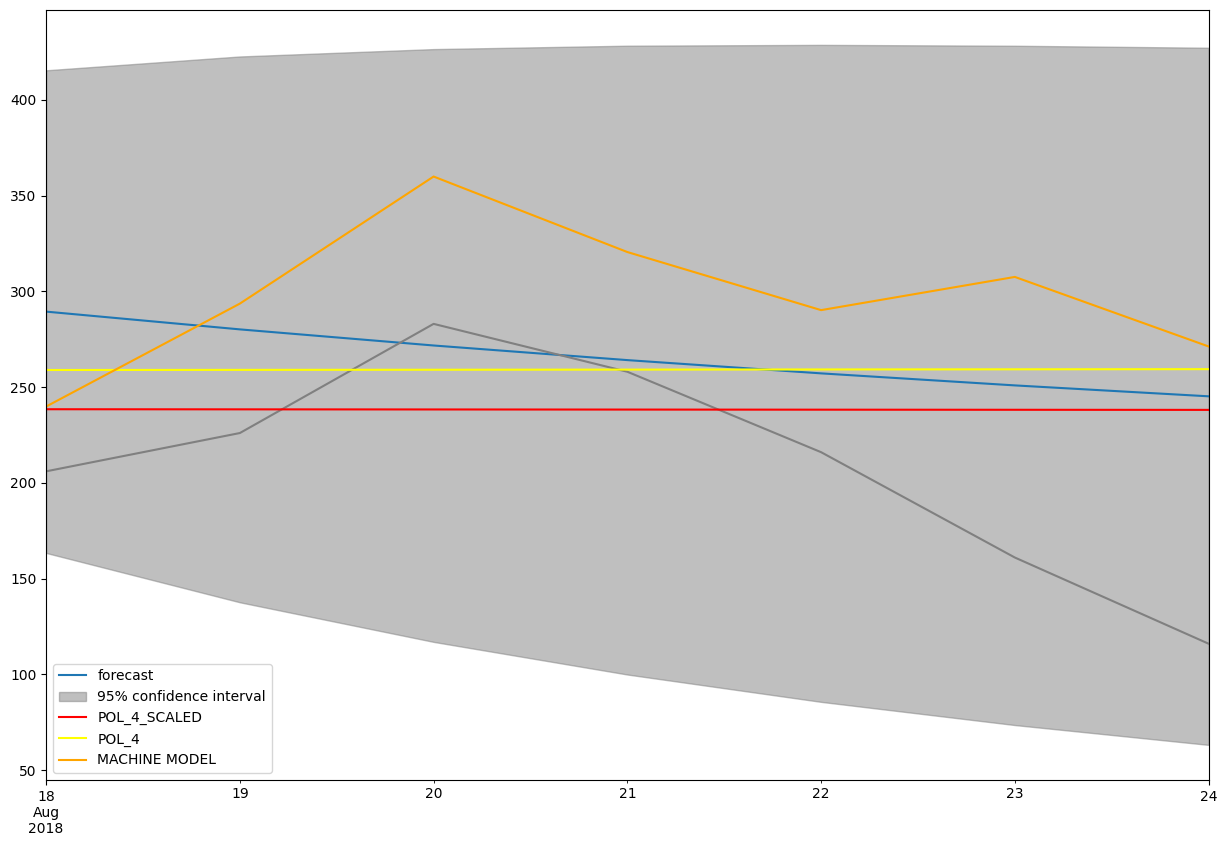

In [85]:
fig, ax = plt.subplots()

plot_predict(ARIMA_model_hsitory, by_day_activity.index[-7], by_day_activity.index[-1], ax=ax)

ax.plot(by_day_activity.index[-7:], y_test, "gray")

ax.plot(by_day_activity.index[-7:], scale_transformer.inverse_transform(np.apply_along_axis(POL_4_SCALED, 0, X_test).reshape(-1,1)), "red", label = "POL_4_SCALED")
ax.plot(by_day_activity.index[-7:], np.apply_along_axis(POL_4, 0, X_test), "yellow", label = "POL_4")
ax.plot(by_day_activity.index[-7:], week_prediction.reshape(-1), "orange", label = "MACHINE MODEL")
    
fig.set_figwidth(15)
fig.set_figheight(10)

ax.legend()

plt.show()

Модель аріма - відображає дуже гарно тренд та сезоність продажів

Поліноміальні моделі - найкраще відобразили загальний рух тренду продаж, фле не здатні відобразити коливання

Машинна модель - машина модель на мою дуику найкраще відобразила майбутній ринок на 7 днів вперед, адже змогла вказати початкове підвищення і подальше невелике падіння продаж, незважаючи на те що вона не вгадала значення напряму